# Spectra acquisiton
Control both the stepping motor and the camera from this notebook.<br>
Make a loop to measure a wide-range spectrum automatically.

NOTE: only one connection to COM port is possible at a time. Shut down other connections, either in python or dedicated software.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time, os, logging
from FLI import FLI
import numpy as np
import xarray as xr
from os.path import join

In [3]:
%run thr640.py
%run imaging_tool.py

In [4]:
logger = logger
logger.setLevel(50) # 10 - DEBUG 50 - CRITICAL 20 - INFO
camera = FLI()
step_motor = THR640() # Can only have one instance.

In [5]:
# basepath = r'\\10.249.254.51\Public\Kuzmin\Experiments-Leprecon\Spectrometer\20210106_test'
basepath = r'C:\Users\fujii\Documents\python\kuzmin\miura\1007'
os.path.exists(basepath)
precount = -1

# Single

In [8]:
##### %run imaging_tool.py

import mkse as mk

name=("Hgamma-test")
count=450000 # 615 nm
count=740000 # 307.5 nm
count=800000 # 226 nm

exposure = 10 * 1e3 # ms

if count != precount:
    step_motor.goto(count)
    step_motor.waitUntilReady()
precount = count

vbin = 1

attributes = {
    "temperature": camera.getTemperature(),
    "device_status": camera.getDeviceStatus(),
    "exposure": exposure,
    "frame_type": "light",
}

camera.setExposureTime(exposure)
camera.setVBin(vbin)
camera.setImageArea(10,0,2058,512//vbin)
time.sleep(.5)
camera.exposeFrame()
time.sleep(.1)
# load image
image_data = camera.grabFrame(out=np.empty((512//vbin,2048), np.uint16))
# convert to xarray
data = xr.DataArray(
    image_data, dims=["y", "x"], coords={"image_counter": 0}, attrs=attributes
)
# save data as NetCDF file
filepath = join(basepath,f'{name}-{count}-{exposure}ms-back.nc')
data.to_netcdf(filepath)
# plot_image(image_data)

array([[1.14651500e+06, 1.14623400e+06, 1.14713400e+06, ...,
        1.59623100e+06, 1.59632500e+06, 1.59493100e+06],
       [2.39447864e+02, 2.39441598e+02, 2.39435332e+02, ...,
        2.26572254e+02, 2.26565928e+02, 2.26559602e+02]])

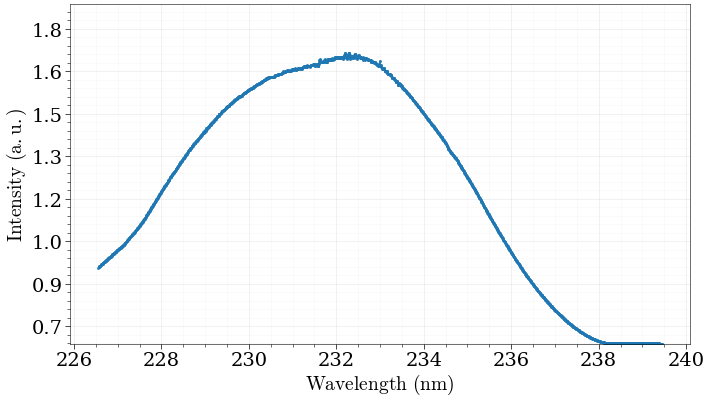

In [9]:
mk.mkses.basepathis(basepath)
mk.mkses.rotationis(count)
mk.display_nc(f'{name}-{count}-{exposure}ms-back.nc')

In [10]:
import mkse as mk

precount = 0
name=("H")
R = [400000 + i*10000 for i in range(41)]
T = [0.1 * 1e3, 1 * 1e3, 10 * 1e3]


for count in R:
    if count != precount:
        step_motor.goto(count)
        step_motor.waitUntilReady()
    precount = count    
    for exposure in T:
        vbin = 1
        attributes = {
            "temperature": camera.getTemperature(),
            "device_status": camera.getDeviceStatus(),
            "exposure": exposure,
            "frame_type": "light",
        }

        camera.setExposureTime(exposure)
        camera.setVBin(vbin)
        camera.setImageArea(10,0,2058,512//vbin)
        time.sleep(.5)
        camera.exposeFrame()
        time.sleep(.1)
        # load image
        image_data = camera.grabFrame(out=np.empty((512//vbin,2048), np.uint16))
        # convert to xarray
        data = xr.DataArray(
            image_data, dims=["y", "x"], coords={"image_counter": 0}, attrs=attributes
        )
        # save data as NetCDF file
        filepath = join(basepath,f'{name}-{count}-{exposure}ms.nc')
        data.to_netcdf(filepath)

array([[1.04437800e+06, 1.04411600e+06, 1.04422000e+06, ...,
        1.08463400e+06, 1.08422900e+06, 1.08447800e+06],
       [6.52500665e+02, 6.52496791e+02, 6.52492917e+02, ...,
        6.44517431e+02, 6.44513497e+02, 6.44509563e+02]])

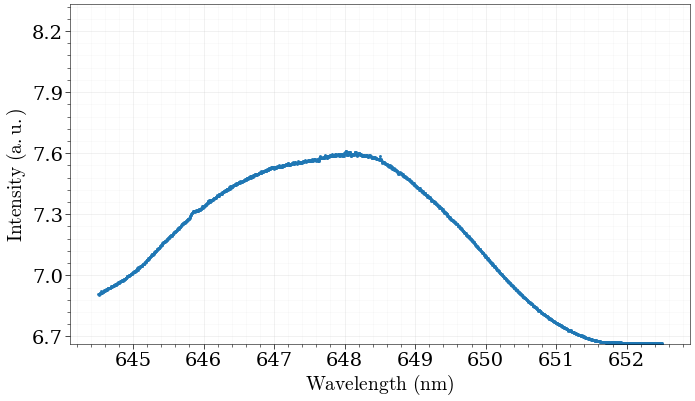

In [16]:
mk.mkses.basepathis(basepath)
mk.mkses.rotationis(count)
mk.display_nc(f'{name}-{count}-10000.0ms.nc')

# LOOP

In [35]:
name=("Th-test")
exposure = 300 * 1e3 # ms
vbin = 1
attributes = {
    "temperature": camera.getTemperature(),
    "device_status": camera.getDeviceStatus(),
    "exposure": exposure,
    "frame_type": "light",
    "motor_coordinate":"",
    "slit_width": "0.3mm",
    "dennryu": 1
}

#R = [100000 + i*5000 for i in range(120)]
R = [800000 + i*5000 for i in range(11)]
#R = [380000 + i*5000 for i in range(25)]
#R = [500000 + i*5000 for i in range(5)]
#R = [300000 + i*5000 for i in range(101)]
# R = [430000 + i*5000 for i in range(8)] #fulcher-alpha
# R = [430000] # 
#R = [700000 + i*10000 for i in range(10)]
#R = [740000 + i*5000 for i in range(5)]
for r in log_progress(R):
    step_motor.goto(r)
    step_motor.waitUntilReady()
    attributes['motor_coordinate'] = r
    
    camera.setExposureTime(exposure)
    camera.setVBin(vbin)
    camera.setImageArea(10,0,2058,512//vbin)
    time.sleep(.5)
    camera.exposeFrame()
    time.sleep(.1)
    # load image
    image_data = camera.grabFrame(out=np.empty((512//vbin,2048), np.uint16))
    # convert to xarray
    data = xr.DataArray(
        image_data, dims=["y", "x"], coords={"image_counter": 0}, attrs=attributes
    )
    # save data as NetCDF file
    filepath = join(basepath,f'{name}-{r}-{exposure}ms.nc')
    print(filepath)
    data.to_netcdf(filepath)
print('Done.')

C:\Users\fujii\Documents\python\kuzmin\miura\0905\Th-test-800000-300000.0ms.nc
C:\Users\fujii\Documents\python\kuzmin\miura\0905\Th-test-805000-300000.0ms.nc
C:\Users\fujii\Documents\python\kuzmin\miura\0905\Th-test-810000-300000.0ms.nc
C:\Users\fujii\Documents\python\kuzmin\miura\0905\Th-test-815000-300000.0ms.nc
C:\Users\fujii\Documents\python\kuzmin\miura\0905\Th-test-820000-300000.0ms.nc
C:\Users\fujii\Documents\python\kuzmin\miura\0905\Th-test-825000-300000.0ms.nc
C:\Users\fujii\Documents\python\kuzmin\miura\0905\Th-test-830000-300000.0ms.nc
C:\Users\fujii\Documents\python\kuzmin\miura\0905\Th-test-835000-300000.0ms.nc
C:\Users\fujii\Documents\python\kuzmin\miura\0905\Th-test-840000-300000.0ms.nc
C:\Users\fujii\Documents\python\kuzmin\miura\0905\Th-test-845000-300000.0ms.nc
C:\Users\fujii\Documents\python\kuzmin\miura\0905\Th-test-850000-300000.0ms.nc
Done.
